## Filtros

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
# from skimage.util import random_noise

#### Filtro Gaussiano

In [2]:
# Parámetros:
# ksize - Tamaño del núcleo, positivo impar (3,5,...)
# sigma - Desvío estándar de la Gaussiana. Si no es positivo, se calcula como sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8 
# ktype - Tipo de coeficientes del filtro (Optional). Puede ser CV_32F o CV_64F
kernel_1d = cv.getGaussianKernel(ksize=5, sigma=1.5) 
kernel_2d = kernel_1d * kernel_1d.T
print(kernel_1d)

print(kernel_2d)
print(f'ganancia: {np.sum(kernel_2d)}')

[[0.12007838]
 [0.23388076]
 [0.29208172]
 [0.23388076]
 [0.12007838]]
[[0.01441882 0.02808402 0.0350727  0.02808402 0.01441882]
 [0.02808402 0.05470021 0.06831229 0.05470021 0.02808402]
 [0.0350727  0.06831229 0.08531173 0.06831229 0.0350727 ]
 [0.02808402 0.05470021 0.06831229 0.05470021 0.02808402]
 [0.01441882 0.02808402 0.0350727  0.02808402 0.01441882]]
ganancia: 0.9999999999999999


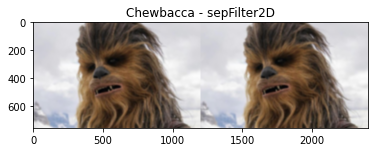

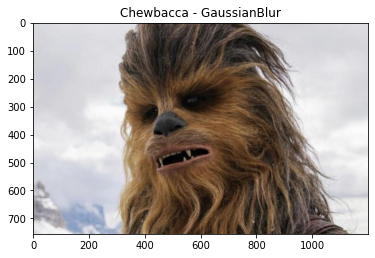

In [3]:
# Suavizado Gaussiano usando el Kernel
#=====================================
img_orig = cv.imread('chewbacca.jpg')
 
# Creamos un núcleo Gaussiano unidimensional
kX = cv.getGaussianKernel(ksize=17, sigma=5)
kY = cv.getGaussianKernel(ksize=17, sigma=5)
 
# Aplicamos el filtro Gaussiano. Con distinto núcleo para X e Y!
result_a = cv.sepFilter2D(img_orig,  ddepth=-1, kernelX=kX, kernelY=kY)

# Más fácil utilizando una única línea
# (cuando el kernel es cuadrado)

result_b = cv.GaussianBlur(img_orig, ksize=(17, 17), sigmaX=5,  sigmaY=5)

# Mostramos la imagen
out1 = cv.hconcat([result_b, result_a])


plt.imshow(out1[..., ::-1])
plt.title('Chewbacca - sepFilter2D')
plt.show()

plt.imshow(img_orig[..., ::-1])
plt.title('Chewbacca - GaussianBlur')
plt.show()

#cv.imshow("Chewbacca - sepFilter2D", out1)
#cv.imshow("Chewbacca - GaussianBlur", img_orig)

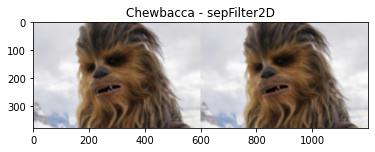

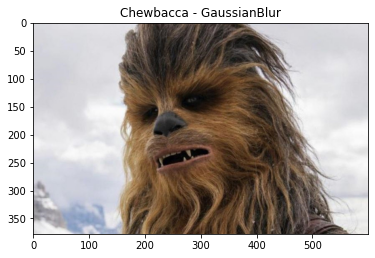

In [4]:
# Redimensionar la imagen
scale_percent = 50  # Porcentaje del tamaño original
width = int(out1.shape[1] * scale_percent / 100)
height = int(out1.shape[0] * scale_percent / 100)
dim = (width, height)

# Redimensionar la imagen de salida del filtro sepFilter2D
resized_out1 = cv.resize(out1, dim, interpolation=cv.INTER_AREA)

# Redimensionar la imagen original (después de aplicar GaussianBlur)
resized_img_orig = cv.resize(img_orig, (int(out1.shape[1] * scale_percent / 200), height), interpolation=cv.INTER_AREA)

# Mostrar las imágenes redimensionadas
plt.imshow(resized_out1[..., ::-1])
plt.title('Chewbacca - sepFilter2D')
plt.show()

plt.imshow(resized_img_orig[..., ::-1])
plt.title('Chewbacca - GaussianBlur')
plt.show()

#cv.imshow("Chewbacca - sepFilter2D / GaussianBlur ", resized_out1)
#cv.imshow("Chewbacca - Original", resized_img_orig)


#### Filtro de media y mediana



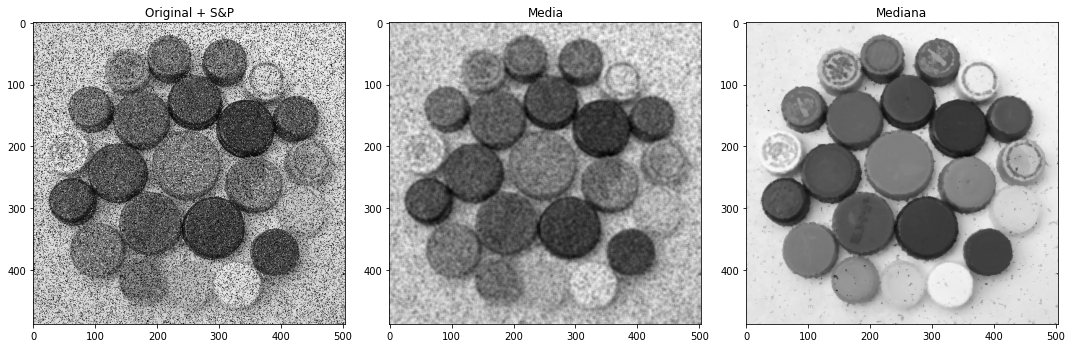

In [5]:
img2 = cv.imread('tapitas.jpg',0)

# Agregar ruido salt&pepper a la imagen
#noise_img = random_noise(img2, mode="s&p", amount=0.3)
#noise_img = np.array(255*noise_img, dtype = 'uint8')

# Otra manera de agregar ruido (no es salt&pepper) con numpy
gauss = np.random.normal(0,1,img2.size)
gauss = gauss.reshape(img2.shape[0],img2.shape[1]).astype('uint8')
noise_img = img2 + img2 * gauss

# Aplicar el filtro de media
mean = cv.blur(noise_img, (5,5))

# Aplicar el filtro de mediana
median = cv.medianBlur(noise_img, 5)
 
# Mostrar la imagen
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(noise_img, cmap='gray')
axs[0].set_title('Original + S&P')
axs[1].imshow(mean, cmap='gray')
axs[1].set_title('Media')
axs[2].imshow(median, cmap='gray')
axs[2].set_title('Mediana')
plt.tight_layout()
plt.show()

#cv.imshow('Original + S&P', noise_img)
#cv.imshow('Media', mean)
#cv.imshow('Mediana', median)

#### DoG

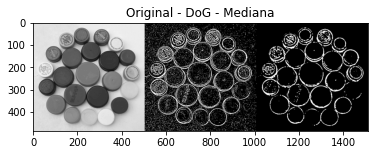

In [6]:
# Cargamos la imagen
img_orig = cv.imread('tapitas.jpg',0)
#img_orig = cv.imread('chewbacca.jpg',0)

# Aplicamos un suavizado Gaussiano de 5x5
low_sigma = cv.GaussianBlur(img_orig, (5,5), sigmaX=1)
high_sigma = cv.GaussianBlur(img_orig, (5,5),sigmaX=1.5)

# Calculamos el DoG por sustracción
dog = low_sigma - high_sigma

# Aplico filtro de mediana para mejorar el resultado
median = cv.medianBlur(dog, 5)

# Mostramos la imagen
out1 = cv.hconcat([img_orig, dog, median])

plt.imshow(out1, cmap='gray')
plt.title('Original - DoG - Mediana')
plt.show()

#cv.namedWindow("DoG", 2)
#cv.imshow("DoG",out1)

#### Unsharp masking

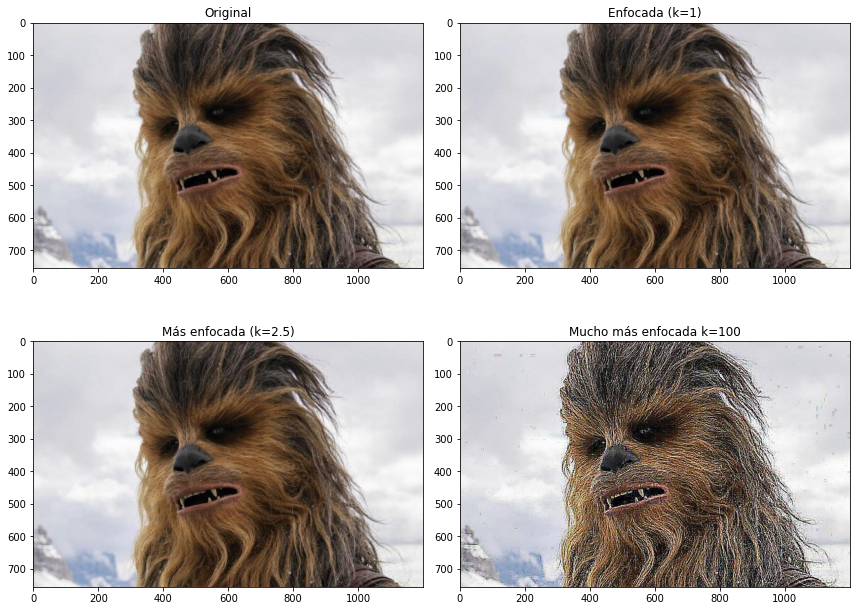

In [39]:
# Cargar la imagen (la carga como BGR)
img_orig = cv.imread("chewbacca.jpg")
# La convertimos a RGB
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
# Suavizar la imagen
gauss = cv.GaussianBlur(img_orig, (7,7), 0.5)
# Aplicar la máscara de enfoque: 
# addWeighted calcula la suma pesada de dos arreglos según: dst(I)=saturate(src1(I)∗alpha+src2(I)∗beta+gamma)
# parámetros: (src1(I),alpha,src2(I),beta,gamma)
img_sharp = cv.addWeighted(img_orig, 2, gauss, -1, 0)

# Más enfocada
k=2.5
img_sharp2 = cv.addWeighted(img_orig, k+1, gauss, -k, 0)

# Mucho más enfocada
k=100
img_sharp3 = cv.addWeighted(img_orig, k+1, gauss, -k, 0)


# Nueva figura
fig = plt.figure(figsize=(12,9))

ax1=plt.subplot(221)
ax1.set_title('Original')
ax1.imshow(img_orig)
ax2=plt.subplot(222)
ax2.set_title('Enfocada (k=1)')
ax2.imshow(img_sharp)
ax3=plt.subplot(223)
ax3.set_title('Más enfocada (k=2.5)')
ax3.imshow(img_sharp2)
ax4=plt.subplot(224)
ax4.set_title(f'Mucho más enfocada k={k}')
ax4.imshow(img_sharp3)

plt.tight_layout()
plt.show()


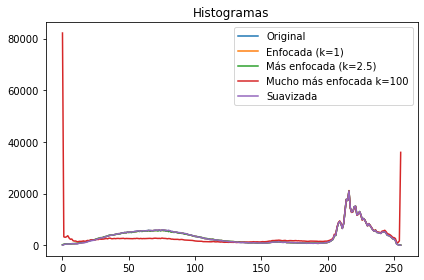

In [40]:
# Compute histogram for each case
# Pass from color to gray scale
img_orig_gray = cv.cvtColor(img_orig, cv.COLOR_RGB2GRAY)
img_sharp_gray = cv.cvtColor(img_sharp, cv.COLOR_RGB2GRAY)
img_sharp2_gray = cv.cvtColor(img_sharp2, cv.COLOR_RGB2GRAY)
img_sharp3_gray = cv.cvtColor(img_sharp3, cv.COLOR_RGB2GRAY)
gauss_gray = cv.cvtColor(gauss, cv.COLOR_RGB2GRAY)

# Compute histograms
hist_orig = cv.calcHist([img_orig_gray], [0], None, [256], [0, 256])
hist_sharp = cv.calcHist([img_sharp_gray], [0], None, [256], [0, 256])
hist_sharp2 = cv.calcHist([img_sharp2_gray], [0], None, [256], [0, 256])
hist_sharp3 = cv.calcHist([img_sharp3_gray], [0], None, [256], [0, 256])
hist_gauss = cv.calcHist([gauss_gray], [0], None, [256], [0, 256])

# Plot histograms
fig = plt.figure()

plt.plot(hist_orig, label='Original')
plt.plot(hist_sharp, label='Enfocada (k=1)')
plt.plot(hist_sharp2, label='Más enfocada (k=2.5)')
plt.plot(hist_sharp3, label=f'Mucho más enfocada k={k}')
plt.plot(hist_gauss, label='Suavizada')
plt.legend()
plt.title('Histogramas')
plt.tight_layout()
plt.show()

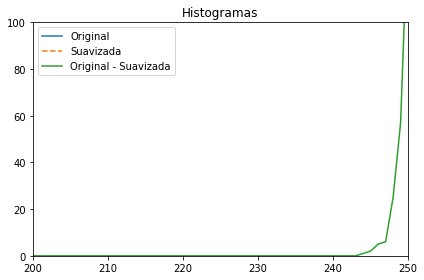

In [38]:
hist = cv.calcHist([img_orig_gray - gauss_gray], [0], None, [256], [0, 256])

# Plot histograms
fig = plt.figure()

plt.plot(hist_orig, label='Original')
plt.plot(hist_gauss, '--', label='Suavizada')
plt.plot(hist, label='Original - Suavizada')
plt.xlim([200, 250])
plt.ylim([0, 100])
plt.legend()
plt.title('Histogramas')
plt.tight_layout()
plt.show()

In [65]:
diff = img_orig_gray - gauss_gray

In [68]:
channels = cv.split(diff)

In [69]:
uniques = np.unique(channels[0])
values = list(channels[0].flatten())
for u in uniques:
    print(f'Valor: {u}, cantidad: {values.count(u)}')

Valor: 0, cantidad: 628079
Valor: 1, cantidad: 106068
Valor: 2, cantidad: 23967
Valor: 3, cantidad: 6548
Valor: 4, cantidad: 1902
Valor: 5, cantidad: 545
Valor: 6, cantidad: 183
Valor: 7, cantidad: 72
Valor: 8, cantidad: 23
Valor: 9, cantidad: 8
Valor: 10, cantidad: 5
Valor: 11, cantidad: 5
Valor: 12, cantidad: 1
Valor: 14, cantidad: 1
Valor: 244, cantidad: 1
Valor: 245, cantidad: 2
Valor: 246, cantidad: 5
Valor: 247, cantidad: 6
Valor: 248, cantidad: 25
Valor: 249, cantidad: 57
Valor: 250, cantidad: 146
Valor: 251, cantidad: 565
Valor: 252, cantidad: 1783
Valor: 253, cantidad: 6264
Valor: 254, cantidad: 24061
Valor: 255, cantidad: 106878


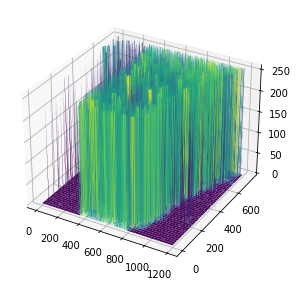

In [70]:
# with x and y between 0 and 255, plot the image in a 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.arange(0, diff.shape[1], 1)
y = np.arange(0, diff.shape[0], 1)
x, y = np.meshgrid(x, y)
z = channels[0]
ax.plot_surface(x, y, z, cmap='viridis')
plt.tight_layout()
plt.show()

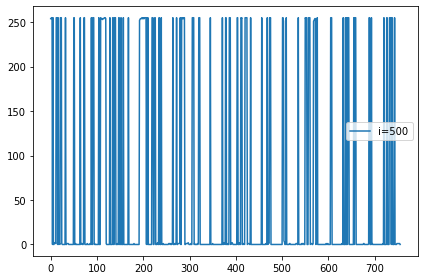

In [71]:
fig = plt.figure()
plt.plot(channels[0][:, 500], label='i=500')
plt.legend()
plt.tight_layout()
plt.show()

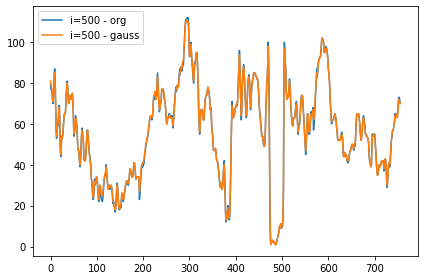

In [75]:
fig = plt.figure()
plt.plot(img_orig_gray[:, 500], label='i=500 - org')
plt.plot(gauss_gray[:, 500], label='i=500 - gauss')
plt.legend()
#plt.xlim([300, 400])
plt.tight_layout()
plt.show()